In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
            discriminant_analysis, random_projection)
import random
from sklearn.preprocessing import normalize

              fid           mjd          ra       dec  magpsf_corr  \
oid                                                                  
ZTF18abefyya    2  58647.293681  274.347583 -7.689340    16.893037   
ZTF18abefyya    2  58575.459016  274.347481 -7.689254    17.355343   
ZTF18abefyya    2  58608.481921  274.347531 -7.689337    17.325110   
ZTF18abefyya    2  58607.356933  274.347498 -7.689360    17.328151   
ZTF18abefyya    2  58605.439329  274.347495 -7.689260    17.296300   

              sigmapsf_corr  
oid                          
ZTF18abefyya       0.024026  
ZTF18abefyya       0.034980  
ZTF18abefyya       0.038761  
ZTF18abefyya       0.039293  
ZTF18abefyya       0.036019  
             classALeRCE          ra        dec     period     source  \
oid                                                                     
ZTF18aakyuls         RRL  275.710304  36.051157   0.550747  CRTSnorth   
ZTF18abnznco         RRL  359.935451  17.656745  0.2710382     ASASSN   
ZTF18aa

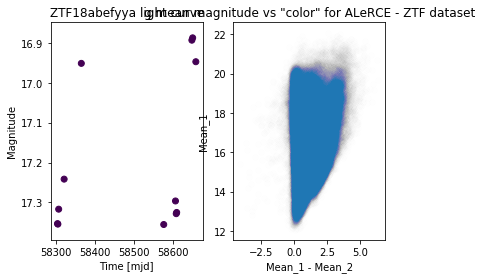

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


detections = pd.read_pickle(r'C:\Users\aleja\Desktop\p8ia\data_representativity\detections_664k.pkl')
features = pd.read_pickle(r'C:\Users\aleja\Desktop\p8ia\data_representativity\features_664k.pkl')
labels = pd.read_pickle(r'C:\Users\aleja\Desktop\p8ia\data_representativity\labels.pkl')

print(detections.head())
print(labels.head())

# How are the classes distributed?
print(labels[['classALeRCE', 'ra']].groupby('classALeRCE').count())

# Plot an object
first_object_oid = detections.index.values[0]#20760278
first_object_detections = detections.loc[first_object_oid]

print(f'Object {first_object_oid} has {len(first_object_detections)} detections')

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    first_object_detections.mjd,
    first_object_detections.magpsf_corr,
    c=first_object_detections.fid)

# In astronomy we plot the magnitude axis inverted (higher magnitude, dimmer objects)
plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{first_object_oid} light curve')

# Let's do a simple scatter of two features
means = features[['Mean_1', 'Mean_2']].copy()
means.dropna(inplace=True)

plt.subplot(1, 2, 2)
plt.scatter(
    means.values[:, 0] - means.values[:, 1],
    means.values[:, 0],
    alpha=0.005
)
plt.ylabel('Mean_1')
plt.xlabel('Mean_1 - Mean_2')
plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')
plt.show()


Text(0.5, 1.0, 'ZTF18abefyya light curve')

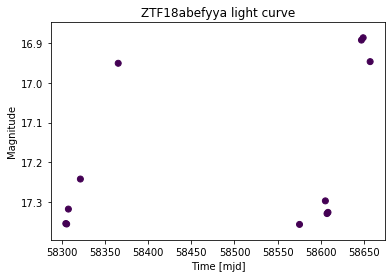

In [3]:
plt.scatter(
    first_object_detections.mjd,
    first_object_detections.magpsf_corr,
    c=first_object_detections.fid)

# In astronomy we plot the magnitude axis inverted (higher magnitude, dimmer objects)
plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{first_object_oid} light curve')

Text(0.5, 1.0, 'g mean magnitude vs "color" for ALeRCE - ZTF dataset')

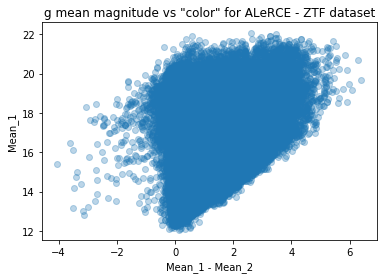

In [4]:
means = features[['Mean_1', 'Mean_2']].copy()
means.dropna(inplace=True)
plt.scatter(
    means.values[:, 0] - means.values[:, 1],
    means.values[:, 0],
    alpha=0.3)
plt.ylabel('Mean_1')
plt.xlabel('Mean_1 - Mean_2')
plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')

In [5]:
features.head()
len(features)
indices=features.index
indices.sort


<bound method Index.sort of Index(['ZTF18abefyya', 'ZTF19aargvjh', 'ZTF18abajact', 'ZTF18abgkapz',
       'ZTF18aaxyved', 'ZTF17aabumwl', 'ZTF18abcqmey', 'ZTF18abijkqv',
       'ZTF18aaxdohp', 'ZTF18aakyuls',
       ...
       'ZTF18acctmzl', 'ZTF18acbzkyg', 'ZTF18abchedb', 'ZTF18aabpvct',
       'ZTF18acdtwwa', 'ZTF17aaaecbv', 'ZTF18aaatyfq', 'ZTF18abmsord',
       'ZTF17aadkyve', 'ZTF18abxuwom'],
      dtype='object', name='oid', length=664657)>

In [6]:
#detections.drop_duplicates(subset =["fid"] , 
                     #keep = False, inplace = True) 
labels.head()

l=labels.iloc[:,0:3]
l=l.dropna()



In [7]:
y = l.iloc[:,0].values
y

array(['RRL', 'RRL', 'RRL', ..., 'RRL', 'EBSD/D', 'EBC'], dtype=object)

In [8]:

p=features.iloc[:,0:96]
p=p.dropna()


In [9]:

X = p.iloc[:,0:96].values
#X = l.iloc[:,:3].values
y = p.iloc[:,0].values
#y = l.iloc[:,0].values

X_std = StandardScaler().fit_transform(X)
cov_mat = np.cov(X_std.T)


In [10]:

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [11]:

#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente

#for i in eig_pairs:
 #   print(i[0])

In [12]:

#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(96,1),
                      eig_pairs[1][1].reshape(96,1)))



Y = X_std.dot(matrix_w)

In [13]:
DFclas=features.loc[labels.index]

In [14]:
DFclas=DFclas.dropna()

In [15]:
a=[]
for i in range(len(DFclas.index)):
    a.append(labels.loc[DFclas.index[i]][0])
    

In [17]:
DFclas2=DFclas

In [18]:
DFclas['clase']=a

In [21]:
RRL1000=DFclas['clase']=='RRL'
dfRRL=DFclas[RRL1000]
AGNI=DFclas['clase']=='AGN-I'
dfAGNI=DFclas[AGNI]
Blazar=DFclas['clase']=='Blazar'
dfBlazar=DFclas[Blazar]
CVNova=DFclas['clase']=='CV/Nova'
dfCVNova=DFclas[CVNova]
EBC=DFclas['clase']=='EBC'
dfEBC=DFclas[EBC]
EBSDD=DFclas['clase']=='EBSD/D'
dfEBSDD=DFclas[EBSDD]
LPV=DFclas['clase']=='LPV'
dfLPV=DFclas[LPV]
PeriodicOther=DFclas['clase']=='Periodic-Other'
dfPO=DFclas[PeriodicOther]
SNIa=DFclas['clase']=='SNIa'
dfSNIa=DFclas[SNIa]
Ceph=DFclas['clase']=='Ceph'
dfCeph=DFclas[Ceph]
DSCT=DFclas['clase']=='DSCT'
dfDSCT=DFclas[DSCT]
SNII=DFclas['clase']=='SNII'
dfSNII=DFclas[SNII]
SNIa=DFclas['clase']=='SNIa'
dfSNIa=DFclas[SNIa]

In [ ]:
AGN-I            8798si
AGN-II             56no
Blazar            755si
CV/Nova           708si
Ceph              563no 360 habian
DSCT              663no 490 habian
EBC              6554si
EBSD/D          24442si
LPV              2856si
Periodic-Other    952si
RRL             15176si
SLSN               14no
SNII              142no
SNIIb               9no
SNIIn              22no
SNIa              569no 357
SNIbc              39no
TDE                 3no
ZZ                  2no

In [23]:
DFequal2=pd.concat([dfRRL[0:100],dfAGNI[0:100],dfBlazar[0:100],dfCVNova[0:100],dfEBC[0:100],dfEBSDD[0:100],dfLPV[0:100],dfPO[0:100],dfCeph[0:100],dfDSCT[0:100],dfSNII[0:100],dfSNIa[0:100]])
DFequal2.head()

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Mean_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,clase
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aakyuls,36.0,0.548401,0.980684,1.0,0.361111,0.0,1.270494,-0.228940,0.138083,17.068348,...,0.000251,0.072333,0.383776,0.404268,-6.619229e-03,0.996894,0.000338,20.971334,63.714680,RRL
ZTF18abnznco,28.0,0.204916,1.000000,1.0,0.392857,0.0,0.024958,-0.090507,0.140619,13.972252,...,0.000066,0.012926,0.297749,0.169156,-9.205407e-09,0.991869,-0.000340,-43.493407,105.847646,RRL
ZTF18aaadcnp,39.0,0.327207,1.000000,1.0,0.461538,0.0,0.653078,-0.135736,0.110238,15.186460,...,0.000097,0.020471,5.087895,0.266094,1.037024e-01,0.236068,0.000048,68.819694,158.479874,RRL
ZTF18aaactjb,60.0,0.349150,1.000000,1.0,0.416667,0.0,0.008650,-0.241208,60.593587,15.686243,...,0.000141,0.035444,0.189598,0.245191,-2.250942e-02,0.994975,-0.000137,39.860309,169.920868,RRL
ZTF18abrntoc,18.0,0.245114,0.999979,1.0,0.444444,0.0,2.131320,-0.216678,0.137048,15.511325,...,0.000096,0.022306,0.188424,0.229629,5.390245e-02,0.998081,-0.000506,-27.591426,30.874000,RRL


## Analisis para base de datos equilibrada de 100 elementos por etiqueta

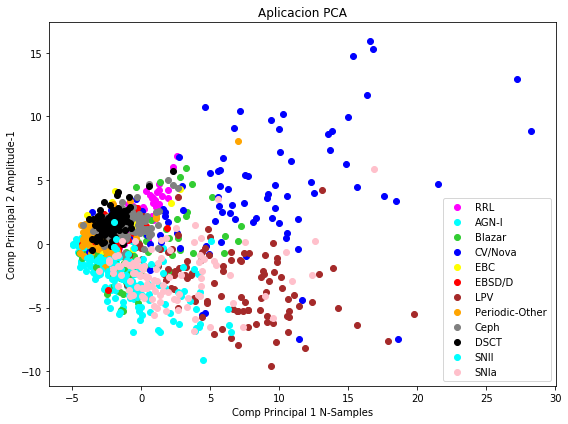

In [24]:
Xeq = DFequal2.iloc[:,0:96].values
#X = l.iloc[:,:3].values
yeq = DFequal2.iloc[:,96].values
#y = l.iloc[:,0].values


Xeq_norm=(Xeq-Xeq.min())/(Xeq.max()-Xeq.min())

Xeq_std = StandardScaler().fit_transform(Xeq_norm)
cov_mat2eq = np.cov(Xeq_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat2eq)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)
matrix_w = np.hstack((eig_pairs[0][1].reshape(96,1),
                      eig_pairs[1][1].reshape(96,1)))

#print('Matriz W:\n', matrix_w)

Yeq = Xeq_std.dot(matrix_w)

plt.figure(figsize=(8, 6))
for lab, col in zip(('RRL','AGN-I','Blazar','CV/Nova','EBC','EBSD/D','LPV','Periodic-Other','Ceph','DSCT','SNII','SNIa'),
                        #('RRL', 'EBC', 'EBSD/D','AGN-I','Blazar','CV/Nova')
                        ('magenta', 'cyan', 'limegreen','blue','yellow','red','brown','orange','gray','black','aqua','pink')):
        plt.scatter(Yeq[yeq==lab, 0],
                    Yeq[yeq==lab, 1],
                    label=lab,
                    c=col)
plt.xlabel('Comp Principal 1 N-Samples')
plt.ylabel('Comp Principal 2 Amplitude-1')
plt.title('Aplicacion PCA')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [25]:
DFequal2.iloc[0,0:96]

n_samples_1                   36
Amplitude_1             0.548401
AndersonDarling_1       0.980684
Autocor_length_1               1
Beyond1Std_1            0.361111
                        ...     
SF_ML_gamma_2        -0.00661923
IAR_phi_2               0.996894
LinearTrend_2        0.000337721
gal_b                    20.9713
gal_l                    63.7147
Name: ZTF18aakyuls, Length: 96, dtype: object

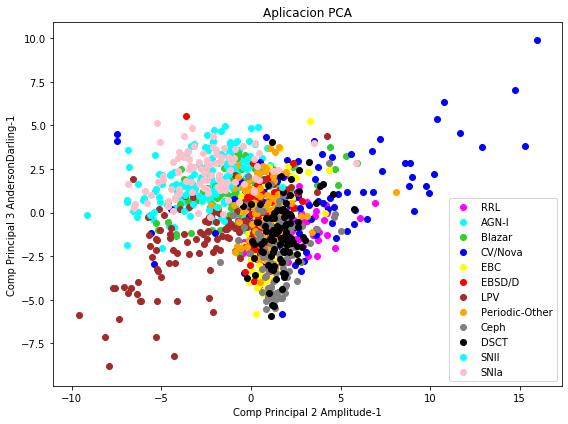

In [27]:
matrix_w = np.hstack((eig_pairs[1][1].reshape(96,1),
                      eig_pairs[2][1].reshape(96,1)))

#print('Matriz W:\n', matrix_w)

Yeq = Xeq_std.dot(matrix_w)

plt.figure(figsize=(8, 6))
for lab, col in zip(('RRL','AGN-I','Blazar','CV/Nova','EBC','EBSD/D','LPV','Periodic-Other','Ceph','DSCT','SNII','SNIa'),
                        #('RRL', 'EBC', 'EBSD/D','AGN-I','Blazar','CV/Nova')
                        ('magenta', 'cyan', 'limegreen','blue','yellow','red','brown','orange','gray','black','aqua','pink')):
        plt.scatter(Yeq[yeq==lab, 0],
                    Yeq[yeq==lab, 1],
                    label=lab,
                    c=col)
plt.xlabel('Comp Principal 2 Amplitude-1')
plt.ylabel('Comp Principal 3 AndersonDarling-1')
plt.title('Aplicacion PCA')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

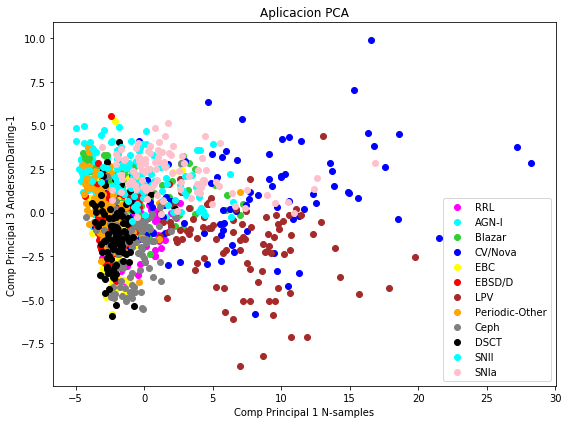

In [28]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(96,1),
                      eig_pairs[2][1].reshape(96,1)))

#print('Matriz W:\n', matrix_w)

Yeq = Xeq_std.dot(matrix_w)

plt.figure(figsize=(8, 6))
for lab, col in zip(('RRL','AGN-I','Blazar','CV/Nova','EBC','EBSD/D','LPV','Periodic-Other','Ceph','DSCT','SNII','SNIa'),
                        #('RRL', 'EBC', 'EBSD/D','AGN-I','Blazar','CV/Nova')
                        ('magenta', 'cyan', 'limegreen','blue','yellow','red','brown','orange','gray','black','aqua','pink')):
        plt.scatter(Yeq[yeq==lab, 0],
                    Yeq[yeq==lab, 1],
                    label=lab,
                    c=col)
plt.xlabel('Comp Principal 1 N-samples')
plt.ylabel('Comp Principal 3 AndersonDarling-1')
plt.title('Aplicacion PCA')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Comparacion de caracteristicas

Text(0.5, 1.0, 'g mean magnitude vs "color" for ALeRCE - ZTF dataset')

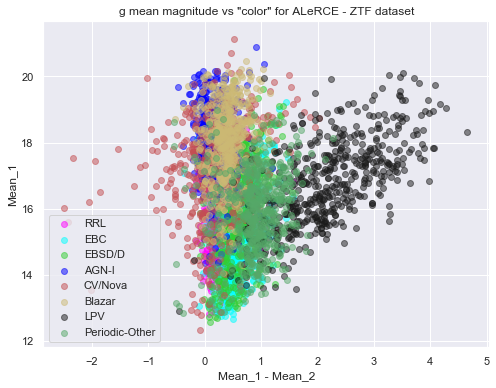

In [31]:
yeq = DFequal.iloc[:,96].values
means2 = DFequal[['Mean_1', 'Mean_2']].copy()
DFequal.dropna(inplace=True)
plt.figure(figsize=(8, 6))
for lab, col in zip(('RRL', 'EBC', 'EBSD/D','AGN-I','CV/Nova','Blazar','LPV','Periodic-Other'),
                        ('magenta', 'cyan', 'limegreen','blue','r','y','k','g')):
    plt.scatter(
                means2.values[yeq==lab, 0] - means2.values[yeq==lab, 1],
                means2.values[yeq==lab, 0],label=lab,c=col, alpha=0.5)
plt.ylabel('Mean_1')
plt.xlabel('Mean_1 - Mean_2')
plt.legend(loc='lower left')
plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')

Text(0.5, 1.0, 'g mean magnitude vs "color" for ALeRCE - ZTF dataset')

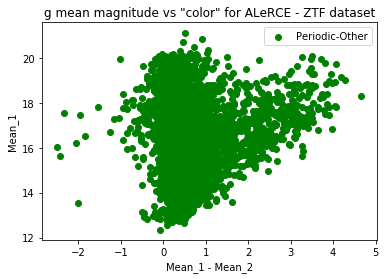

In [132]:
means2 = DFequal[['Mean_1', 'Mean_2']].copy()
means2.dropna(inplace=True)
plt.figure(figsize=(8, 6))
plt.scatter(
    means2.values[:, 0] - means2.values[:, 1],
    means2.values[:, 0],label=lab,c=col)#,alpha=0.005)
plt.ylabel('Mean_1')
plt.xlabel('Mean_1 - Mean_2')
plt.legend()
plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')

Text(0.5, 1.0, 'g mean magnitude vs "color" for ALeRCE - ZTF dataset')

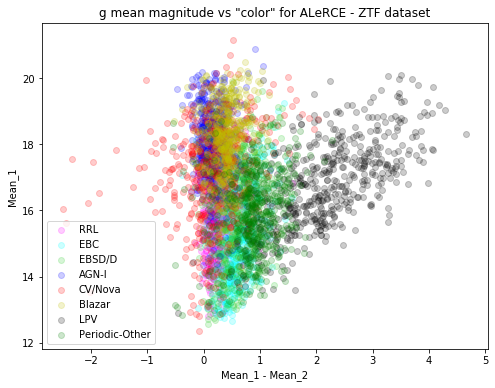

In [157]:
yeq = DFequal.iloc[:,96].values
means2 = DFequal[['Mean_1', 'Mean_2']].copy()
DFequal.dropna(inplace=True)
plt.figure(figsize=(8, 6))
for lab, col in zip(('RRL', 'EBC', 'EBSD/D','AGN-I','CV/Nova','Blazar','LPV','Periodic-Other'),
                        ('magenta', 'cyan', 'limegreen','blue','r','y','k','g')):
    plt.scatter(
                means2.values[yeq==lab, 0] - means2.values[yeq==lab, 1],
                means2.values[yeq==lab, 0],label=lab,c=col, alpha=0.2)
plt.ylabel('Mean_1')
plt.xlabel('Mean_1 - Mean_2')
plt.legend(loc='lower left')
plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')